## Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?). Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? How would you measure the effectiveness of a
good prediction algorithm? Be specific.

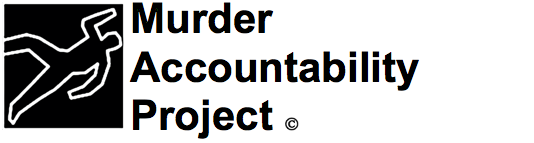


### Content
The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

1980 to 2014

America does a poor job tracking and accounting for its unsolved homicides. Every year, at least 5,000 killers get away with murder. The rate at which police clear homicides through arrest has declines year over year. About a third of all murders go unsolved.

No one knows all the names of the murder victims because no law enforcement agency in America is assigned to monitor failed homicide investigations by local police departments. Even the official national statistics on murder are actually estimates and projections based upon incomplete reports by police departments that voluntarily choose (or refuse) to participate in federal crime reporting programs.

The Murder Accountability Project is a nonprofit group organized in 2015 and dedicated to educate Americans on the importance of accurately accounting for unsolved homicides within the United States. We seek to obtain information from federal, state and local governments about unsolved homicides and to publish this information. The Project’s Board of Directors is composed of retired law enforcement investigators, investigative journalists, criminologists and other experts on various aspects of homicide. 


Acknowledgements
The data was compiled and made available by the Murder Accountability Project, founded by Thomas Hargrove.
https://www.murderdata.org/

In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sv
import autoviz
import xgboost
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
sns.set(color_codes=True)
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(22,10),facecolor='#ffffff')

In [ ]:
from pandas_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from funpymodeling.exploratory import corr_pair
from autoplotter import run_app 
from ExploriPy import EDA

In [ ]:
homicide_df = pd.read_csv('../Data/database.csv', low_memory=False)

In [ ]:
# Return the first five observation from the data set
homicide_df.head()

In [ ]:
profile = ProfileReport(homicide_df, title="Pandas Profiling Report")
profile

In [ ]:
# Return the last five observation from the data set
homicide_df.tail()

In [ ]:
# Column contents and data types
homicide_df.info()

In [ ]:
# Total number of rows and columns
homicide_df.shape

In [ ]:
# check for null values
homicide_df.isnull().sum()

In [ ]:
# homicide_df.<column>.unique()

In [ ]:
# homicide_df.<column>.value_counts()

In [ ]:
homicide_df.columns

In [ ]:
# Checking the data type
homicide_df.dtypes

In [ ]:
homicide_df.values

In [ ]:
# Rows containing duplicate data
duplicate_rows_df = homicide_df[homicide_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# to drop duplicates
# df = df.drop_duplicates()

In [ ]:
homicide_df.describe

In [ ]:
# count, mean, standard deviation, minimum and maximum values and the quantities of the data
homicide_df.describe().T

In [ ]:
homicide_df[['City']].describe

In [ ]:
homicide_df[['State']].describe

In [ ]:
homicide_df[['Weapon']].describe

In [ ]:
# check for null/missing values
sns.set()
sns.heatmap(homicide_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [ ]:
# check correlation
plt.figure(figsize=(8,4))
sns.heatmap(homicide_df.corr(),cmap='Greens',annot=False)

In [ ]:
plt.figure(figsize = (18,8))
homicide_df["State"].value_counts().plot.bar();

states_vis = sns.countplot(x='State', order=df['State'].value_counts().index, data=homicide_df);

for item in states_vis.get_xticklabels():
    item.set_rotation(90)

In [ ]:
homicide_pv = homicide_df.pivot_table(index=["Year"], columns=["Month"],aggfunc=(lambda x : x.count()))["Incident"]
homicide_pv = homicide_pv.reindex(columns=["January","February","March","April","May","June","July","August","September","October","November","December"])

homicide_pv.plot();

In [ ]:
sns.heatmap(homicide_pv);

In [ ]:
homicide_year = homicide_df.groupby("Year")["Incident"].sum()
homicide_year = pd.DataFrame(homicide_year)

plt.title("Number of Homicide by Years");
sns.lineplot(x=homicide_year.index, y= "Incident", data=homicide_year);

In [ ]:
# Detect outliers
sns.boxplot(x=homicide_df['Incident'])

In [ ]:
# Detect outliers
homicide_df.boxplot(column=['Incident'])
plt.show()

In [ ]:
Q1 = homicide_df.quantile(0.25)
Q3 = homicide_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
df = homicide_df[~((homicide_df < (Q1-1.5 * IQR)) |(homicide_df > (Q3 + 1.5 * IQR))).any(axis=1)]
homicide_df.shape

In [ ]:
# Plotting a Histogram
homicide_df.Month.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Incidents")
plt.ylabel('Incident')
plt.xlabel('Month');

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(homicide_df['Month'], homicide_df['Incident'])
ax.set_xlabel('Month')
ax.set_ylabel('Incident')
plt.show()

In [ ]:
ax = sns.boxplot(x="Victim Sex", y="Victim Age", data=homicide_df,hue="Weapon",color='#666666', palette="tab20")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Victim Sex', y='Victim Age', data=homicide_df, color="orange", jitter=0.5, size=5,alpha=0.02)

plt.title("Victims Age , Weapon \n", loc="center",size=24,color='#ff0000',alpha=0.6,weight='bold')
plt.xlabel('',color='#34495E',fontsize=20) 
plt.ylabel('Victims Age',color='#34495E',fontsize=20)
plt.xticks(size=18,color='#008abc',rotation='horizontal', wrap=True)
plt.yticks(size=15,color='#006600')
plt.ylim(0,100)
plt.legend(loc="upper right",fontsize=13,ncol=4,title='Crime Weapon',title_fontsize=18,facecolor='#ffffcc',framealpha=0.99)
plt.show()

In [ ]:
ax = sns.boxplot(x="Crime Solved", y="Victim Age", data=homicide_df,hue="Weapon",color='#666666', palette="tab20")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Crime Solved', y='Victim Age', data=homicide_df, color="orange", jitter=0.5, size=5,alpha=0.02)

plt.title("Victim Age , Weapon and if Crime Solved \n", loc="center",size=24,color='#ff0000',alpha=0.6,weight='bold')
plt.xlabel('',color='#34495E',fontsize=20) 
plt.ylabel('Victims Age',color='#34495E',fontsize=20)
plt.xticks(size=18,color='#008abc',rotation='horizontal', wrap=True)
plt.yticks(size=15,color='#006600')
plt.ylim(0,100)
plt.legend(loc="upper right",fontsize=13,ncol=4,title='Crime Weapon',title_fontsize=18,facecolor='#ffffcc',framealpha=0.99)
plt.show()

In [ ]:
ax = sns.boxplot(x="Relationship", y="Victim Age", data=homicide_df,color='#666666', palette="tab20")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Relationship', y='Victim Age', data=homicide_df, hue='Victim Sex', cmap='Dark2', jitter=0.5, size=5,alpha=0.02)

plt.title("Victim Age and Relationship \n", loc="center",size=24,color='#ff0000',alpha=0.6,weight='bold')
plt.xlabel('',color='#34495E',fontsize=20) 
plt.ylabel('Victims Age',color='#34495E',fontsize=20)
plt.xticks(size=18,color='#ff3333',rotation='vertical',wrap=True,weight='bold')
plt.yticks(size=15,color='#006600')
plt.ylim(0,100)
plt.legend(loc="upper right",fontsize=16,ncol=4,title='Victim Sex',title_fontsize=20,facecolor='#ffffcc',framealpha=0.99)
plt.show()

In [ ]:
ax = sns.boxplot(x="Year", y="Victim Age", data=homicide_df,color='#666666', palette="Purples")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Year', y='Victim Age', data=homicide_df, color="orange", jitter=0.5, size=5,alpha=0.02)

plt.title("Victim Age and Trend \n", loc="center",size=24,color='#ff0000',alpha=0.6,weight='bold')
plt.xlabel('',color='#34495E',fontsize=20) 
plt.ylabel('Victims Age',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='vertical',wrap=True)
plt.yticks(size=15,color='#006600')
plt.ylim(0,100)
plt.legend(loc="upper right",fontsize=13,ncol=4,title='Year',title_fontsize=18,facecolor='#ffffcc',framealpha=0.99)
plt.show()

In [ ]:
homicide_df = (homicide_df.drop(['Record ID', 'Agency Code','Victim Ethnicity','Perpetrator Ethnicity',
                                 'Record Source'],axis=1))

#print(homicide_df.head())
Victim_Sex = homicide_df['Victim Sex'].values
Victim_Age = homicide_df['Victim Age'].values
#Victim_Age = Victim_Age.astype('int16')
Perpetrator_Sex = homicide_df['Perpetrator Sex'].values
Perpetrator_Age = homicide_df['Perpetrator Age'].values
#Perpetrator_Age = Perpetrator_Age.astype('int16')
Relationship = homicide_df['Relationship'].values
Weapon = homicide_df['Weapon'].values
Solved = homicide_df['Crime Solved'].values
V_Race = homicide_df['Victim Race'].values
P_Race = homicide_df['Perpetrator Race'].values
Crime_Type = homicide_df['Crime Type'].values
Agency_Name = homicide_df['Agency Name'].values
Agency_Type = homicide_df['Agency Type'].values
P_Count =  homicide_df['Perpetrator Count'].values
City =  homicide_df['City'].values
State =  homicide_df['State'].values
Year =  homicide_df['Year'].values
Month =  homicide_df['Month'].values
Rel_Category = homicide_df['Relationship'].values
W_Category = homicide_df['Weapon'].values

homicide = pd.DataFrame(np.column_stack((Victim_Sex,Victim_Age,Perpetrator_Sex,Perpetrator_Age,
                    Relationship,Weapon,Solved,V_Race,P_Race,Crime_Type,Agency_Name,Agency_Type,
                    Rel_Category,P_Count,City,State,Year,Month,W_Category)))
homicide.columns = ['Victim_Sex','Victim_Age','Perpetrator_Sex','Perpetrator_Age','Relationship',
                    'Weapon','Solved','V_Race','P_Race','Crime_Type','Agency_Name','Agency_Type',
                    'Rel_Category','P_Count','City','State','Year','Month','W_Category']

homicide.loc[(homicide['Relationship'] == 'Wife') | (homicide['Relationship'] == 'Ex-Wife') |
             (homicide['Relationship'] == 'Girlfriend') |
             (homicide['Relationship'] == 'Common-Law Wife'), 'Rel_Category'] = 'Partner-F'

homicide.loc[(homicide['Relationship'] == 'Husband') | (homicide['Relationship'] == 'Ex-Husband') |
             (homicide['Relationship'] == 'Boyfriend') | 
             (homicide['Relationship'] == 'Common-Law Husband'), 'Rel_Category'] = 'Partner-M'

homicide.loc[(homicide['Relationship'] == 'Father') | (homicide['Relationship'] == 'In-Law') |
             (homicide['Relationship'] == 'Mother') | (homicide['Relationship'] == 'Stepfather') |
             (homicide['Relationship'] == 'Stepmother'), 'Rel_Category'] = 'Parent'

homicide.loc[(homicide['Relationship'] == 'Daughter') | (homicide['Relationship'] == 'Son') |
             (homicide['Relationship'] == 'Stepdaughter') | 
             (homicide['Relationship'] == 'Stepson'), 'Rel_Category'] = 'Children'

homicide.loc[(homicide['Relationship'] == 'Brother') | (homicide['Relationship'] == 'Sister'),
             'Rel_Category'] = 'Sibling'

homicide.loc[(homicide['Relationship'] == 'Employee') | (homicide['Relationship'] == 'Employer') ,
             'Rel_Category'] = 'Work'

homicide.loc[(homicide['Relationship'] == 'Boyfriend/Girlfriend') & (homicide['Victim_Sex'] == 'Female'),
             'Rel_Category'] = 'Partner-F'

homicide.loc[(homicide['Relationship'] == 'Boyfriend/Girlfriend') & ((homicide['Victim_Sex'] == 'Male') |
            (homicide['Victim_Sex'] == 'Unknown')) , 'Rel_Category'] = 'Partner-M'

FV_MP = homicide[(homicide.Victim_Sex == 'Female') & (homicide.Perpetrator_Sex == 'Male')]
FV_FP = homicide[(homicide.Victim_Sex == 'Female') & (homicide.Perpetrator_Sex == 'Female')]
MV_MP = homicide[(homicide.Victim_Sex == 'Male') & (homicide.Perpetrator_Sex == 'Male')]
MV_FP = homicide[(homicide.Victim_Sex == 'Male') & (homicide.Perpetrator_Sex == 'Female')]
FV_UP = homicide[(homicide.Victim_Sex == 'Female') & (homicide.Perpetrator_Sex == 'Unknown')]
MV_UP = homicide[(homicide.Victim_Sex == 'Male') & (homicide.Perpetrator_Sex == 'Unknown')]
UV_UP = homicide[(homicide.Victim_Sex == 'Unknown') & (homicide.Perpetrator_Sex == 'Unknown')]

homicide.head(2)

In [ ]:
pd.crosstab(homicide.Victim_Sex,homicide.Perpetrator_Sex)

In [ ]:
plt.figure(figsize=(10,20),facecolor='#eeeeee')
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.6,wspace=.5)

plt.subplot(12, 12, (1,5))
plt.xlim([0,100])
sns.distplot(FV_MP.Perpetrator_Age,color='blue',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (13,41))
plt.title('Female Victim, Male Perpetrator',fontsize=18,fontweight='bold',color='mediumorchid')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(FV_MP.Perpetrator_Age,FV_MP.Victim_Age, s=20, c='mediumorchid', alpha=0.08)
plt.ylabel('Victim Age')
plt.xlabel('Perpetrator Age')

plt.subplot(12, 12, (18,42))
plt.ylim([0,100])
sns.distplot(FV_MP.Victim_Age,color='hotpink',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (7,11))
plt.xlim([0,100])
sns.distplot(MV_FP.Perpetrator_Age,color='hotpink',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (19,47))
plt.title('Male Victim, Female Perpetrator',fontsize=18,fontweight='bold',color='mediumpurple')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(MV_FP.Perpetrator_Age,MV_FP.Victim_Age, s=20, c='mediumpurple', alpha=0.08)
plt.xlabel('Perpetrator Age')


plt.subplot(12, 12, (24,48))
plt.ylim([0,100])
sns.distplot(MV_FP.Victim_Age,color='blue',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (49,53))
plt.xlim([0,100])
sns.distplot(FV_FP.Perpetrator_Age,color='hotpink',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (61,89))
plt.title('Female Victim, Female Perpetrator',fontsize=18,fontweight='bold',color='hotpink')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(FV_FP.Perpetrator_Age,FV_FP.Victim_Age, s=20, c='hotpink', alpha=0.08)
plt.ylabel('Victim Age')
plt.xlabel('Perpetrator Age')

plt.subplot(12, 12, (66,90))
plt.ylim([0,100])
sns.distplot(FV_FP.Victim_Age,color='hotpink',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])


plt.subplot(12, 12, (55,59))
plt.xlim([0,100])
sns.distplot(MV_MP.Perpetrator_Age,color='blue',hist=False,kde=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (67,95))
plt.title('Male Victim, Male Perpetrator',fontsize=18,fontweight='bold',color='blue')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter(MV_MP.Perpetrator_Age,MV_MP.Victim_Age, s=20, c='blue', alpha=0.08)
plt.xlabel('Perpetrator Age')

plt.subplot(12, 12, (72,96))
plt.ylim([0,100])
sns.distplot(MV_MP.Victim_Age,color='blue',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.subplot(12, 12, (97,101))
plt.xlim([0,100])
plt.xlabel('')
plt.xticks([])
plt.yticks([])

MV_UP_j = np.random.random(len(MV_UP)) * 12
FV_UP_j = np.random.random(len(FV_UP)) * 12
UV_UP_j = np.random.random(len(UV_UP)) * 12

plt.subplot(12, 12, (109,137))
plt.title('Unknown Perpetrator',fontsize=18,fontweight='bold',color='dimgrey')
plt.ylim([0,100])
plt.xlim([0,100])
plt.scatter((MV_UP.Victim_Age*0+20+MV_UP_j),MV_UP.Victim_Age, s=20, c='blue', alpha=0.08)
plt.scatter((FV_UP.Victim_Age*0+50+FV_UP_j),FV_UP.Victim_Age, s=20, c='hotpink', alpha=0.08)
plt.scatter((UV_UP.Victim_Age*0+80+UV_UP_j),UV_UP.Victim_Age, s=20, c='darkgrey', alpha=0.08)
plt.ylabel('Victim Age')
plt.xlabel('Perpetrator Age Unknown')
plt.xticks([])

plt.subplot(12, 12, (114,138))
plt.ylim([0,100])
sns.distplot(FV_UP.Victim_Age,color='hotpink',vertical=True,hist=False,kde=True)
sns.distplot(MV_UP.Victim_Age,color='blue',vertical=True,hist=False,kde=True)
sns.distplot(UV_UP.Victim_Age,color='darkgrey',vertical=True,hist=False,kde=True)
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)

cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.kdeplot(FV_MP.Perpetrator_Age, FV_MP.Victim_Age, cmap=cmap, shade=True, ax=axes[0,0])
axes[0,0].set(xlim=(0, 100), ylim=(0, 100),  title = 'Female Victim, Male Perpetrator')

cmap = sns.cubehelix_palette(start=.5, light=1, as_cmap=True)
sns.kdeplot(FV_FP.Perpetrator_Age, FV_FP.Victim_Age, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(xlim=(0, 100), ylim=(0, 100),  title = 'Female Victim, Female Perpetrator')

cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
sns.kdeplot(MV_FP.Perpetrator_Age, MV_FP.Victim_Age, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(xlim=(0, 100), ylim=(0, 100),  title = 'Male Victim, Female Perpetrator')

cmap = sns.cubehelix_palette(start=1.5, light=1, as_cmap=True)
sns.kdeplot(MV_MP.Perpetrator_Age, MV_MP.Victim_Age, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(xlim=(0, 100), ylim=(0, 100),  title = 'Male Victim, Male Perpetrator')

f.tight_layout()

In [ ]:
pd.crosstab(homicide.Rel_Category,homicide.Weapon)

In [ ]:
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.35,wspace=.35)
homicide = homicide[(homicide.Victim_Age != ' ') & (homicide.Perpetrator_Age != ' ')]
R = ['Partner-F', 'Partner-M', 'Parent', 'Children', 'Sibling','Family','Friend','Work','Neighbor','Acquaintance','Stranger','Unknown']
W = ['Handgun', 'Firearm', 'Shotgun', 'Rifle', 'Gun','Knife','Blunt Object','Unknown','Strangulation','Suffocation','Fire','Explosives','Drugs','Poison','Drowning','Fall']
homicide.loc[(homicide['Weapon'] == 'Handgun') | (homicide['Weapon'] == 'Firearm') |
             (homicide['Weapon'] == 'Shotgun') | (homicide['Weapon'] == 'Rifle')   |
             (homicide['Weapon'] == 'Gun'), 'W_Category'] = 'yellow'
homicide.loc[(homicide['Weapon'] == 'Strangulation') | (homicide['Weapon'] == 'Suffocation') , 'W_Category'] = 'steelblue'
homicide.loc[(homicide['Weapon'] == 'Drowning') | (homicide['Weapon'] == 'Fall') , 'W_Category'] = 'olive'
homicide.loc[(homicide['Weapon'] == 'Fire') | (homicide['Weapon'] == 'Explosives') , 'W_Category'] = 'palegreen'
homicide.loc[(homicide['Weapon'] == 'Drugs') | (homicide['Weapon'] == 'Poison') , 'W_Category'] = 'mediumblue'
homicide.loc[(homicide['Weapon'] == 'Knife') , 'W_Category'] = 'red'
homicide.loc[(homicide['Weapon'] == 'Blunt Object') , 'W_Category'] = 'purple'
homicide.loc[(homicide['Weapon'] == 'Unknown') , 'W_Category'] = 'silver'

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.title(R[i],fontsize=14,fontweight='bold',color='brown')
    plt.ylim([0,100])
    plt.xlim([0,100])
    #plt.scatter(homicide[homicide.Rel_Category == R[i]].Perpetrator_Age,homicide[homicide.Rel_Category == R[i]].Victim_Age, marker='o',s=10, c=homicide.W_Category, alpha=0.08)
    plt.scatter(homicide[homicide.Rel_Category == R[i]].Perpetrator_Age,homicide[homicide.Rel_Category == R[i]].Victim_Age, marker='o',s=10, color='orange', alpha=0.08)
    plt.ylabel('Victim Age')
    plt.xlabel('Perpetrator Age')
    
plt.show()

In [ ]:
plt.figure(figsize=(12,8),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Rel_Category,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')
plt.title('Relationship and Weapon\n',fontsize=26,color='brown')

In [ ]:
plt.figure(figsize=(12,5),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.P_Race,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')
plt.title('Perpetrator Race and Weapon\n',fontsize=26,color='brown')

In [ ]:
plt.figure(figsize=(12,18),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Year,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')
plt.title('Crime Year and Weapon\n',fontsize=26,color='brown')

In [ ]:
plt.figure(figsize=(12,20),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.State,homicide.Weapon), annot=True, fmt="d", linewidths=.5,cmap='Reds')
plt.title('Crime State and Weapon\n',fontsize=26,color='brown')

In [ ]:
plt.figure(figsize=(24,18),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab(homicide.Year,homicide.Month), annot=True, fmt="d", linewidths=.5,cmap='Reds')
plt.title('Crime Year and Month\n',fontsize=26,color='brown')

In [ ]:
plt.figure(figsize=(12,12),facecolor='#eeeeee')
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.35,wspace=.35)
homicide = homicide[(homicide.Victim_Age != ' ') & (homicide.Perpetrator_Age != ' ')]
W = ['Handgun', 'Firearm', 'Shotgun', 'Rifle', 'Gun','Knife','Blunt Object','Unknown','Strangulation','Suffocation','Fire','Explosives','Drugs','Poison','Drowning','Fall']
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(W[i],fontsize=14,fontweight='bold',color='brown')
    plt.ylim([0,100])
    plt.xlim([0,100])
    plt.scatter(homicide[homicide.Weapon == W[i]].Perpetrator_Age,homicide[homicide.Weapon == W[i]].Victim_Age, marker='o',s=10, c='red', alpha=0.08)
    plt.ylabel('Victim Age')
    plt.xlabel('Perpetrator Age')

plt.show()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,10),facecolor='#eeeeee')
plt.subplots_adjust(bottom=0, left=.05, right=1.5, top=0.9, hspace=.35,wspace=.35)
homicide = homicide[(homicide.Victim_Age != ' ') & (homicide.Perpetrator_Age != ' ')]
R = ['Partner-F', 'Partner-M', 'Parent', 'Children', 'Sibling','Family','Friend','Work','Neighbor','Acquaintance','Stranger','Unknown']
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.title(R[i],fontsize=14,fontweight='bold',color='brown')
    plt.ylim([0,100])
    plt.xlim([0,100])
    plt.scatter(homicide[homicide.Rel_Category == R[i]].Perpetrator_Age,homicide[homicide.Rel_Category == R[i]].Victim_Age, marker='o',s=10, c='red', alpha=0.08)
    plt.ylabel('Victim Age')
    plt.xlabel('Perpetrator Age')

plt.show()

In [ ]:
plt.figure(figsize=(6,12),facecolor='#efefef')
sns.set()
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
sns.heatmap(pd.crosstab([database_df['Year']],database_df['Crime Solved']), annot=True, fmt="d", linewidths=.5,cmap='Reds')
plt.title('If Crime Solved - Trend\n',fontsize=26,color='brown')

In [ ]:
pivot = homicide_df.groupby(['Weapon','State','Year','Crime Solved'])['Incident'].agg(['sum'])
pivot

In [ ]:
fig = px.scatter(homicide_df, x="State",y='Weapon', color="Crime Solved",
                 hover_name="Weapon",template="plotly_dark",
                 animation_frame='Year',animation_group='State')
fig.show()

In [ ]:
pd.pivot_table(homicide,columns = ['Solved'],index = ['P_Race'],aggfunc='count',fill_value='')

In [ ]:
k = 12
cols = homicide_df.corr().nlargest(k, 'Incident')['Incident'].index
cm = homicide_df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
sweet_report = sv.analyze(homicide_df)
sweet_report.show_html('sweet_report.html')

In [ ]:
df1 = sv.compare(homicide_df[102:], homicide_df[:102])
df1.show_html('Compare.html')

In [ ]:
df = AV.AutoViz('../Data/database.csv')
df

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
#https://analyticsindiamag.com/beginners-guide-to-pyjanitor-a-python-tool-for-data-cleaning/
# for normalizing, scaling, and encoding categorical values

In [ ]:
#Pairwaise correlation analysis
res=corr_pair(homicide_df)
res

In [ ]:
run_app(homicide_df)

In [ ]:
CategoricalFeatures = ['City','State']
eda = EDA(homicide_df,CategoricalFeatures,OtherFeatures=['Year'],title='Exploratory Data Analysis')


In [ ]:
eda.TargetAnalysis('Incident') # For Target Specific Analysis

In [ ]:
# sample EDA
#https://github.com/Dongee-W/EDA-python-spark/blob/master/seaborn.ipynb